omega= 50.26548245743669 Hz


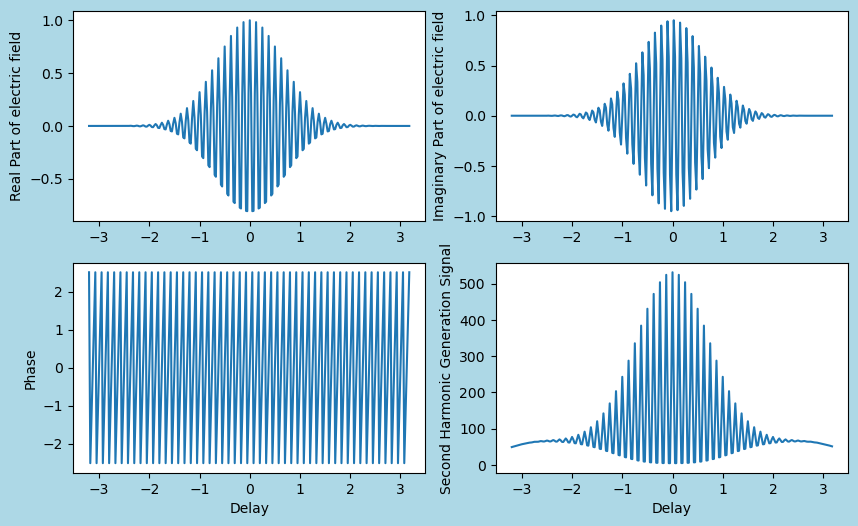

In [12]:
#autocorrelation_interferom

import numpy as np
import matplotlib.pyplot as plt

def proc1(freq=8,pulsewidth=0.4,m=256,steptime=0.025):

    tcol = np.zeros((m,1)); # time
    
    Etcol = np.ones(m, dtype=complex);#*2
       
    Signalcol = np.ones(m, dtype=complex);#*2

    omega = 2*np.pi*freq
 
    print('omega=', omega, 'Hz')


    # PD signal. Proportional to optical power
    #Signal = 0


    for ii in range(m):

        delay1 = steptime*ii-0.5*steptime*m   

        s = 0
        
        for jj in range(m):

            time1 = steptime*jj-0.5*steptime*m
            tcol[(jj)] = time1
            
            Et = np.exp(1j * omega * time1) * np.exp(-1.38 * (time1/pulsewidth)**2)
            
            Etcol[(jj)] = Et
            
            #Et = math.sin(omega * time1)     

            td = time1 + delay1

            Etd = np.exp(1j * omega * td) * np.exp(-1.38 * (td/pulsewidth)**2)                          

            s += (abs(Et+Etd)**2)**2            

              #Signalcol[(ii)] = Etd
            Signalcol[(ii)] = s

    return tcol, Etcol,Signalcol


freq = 8
# Frequency of Carrier wave

pulsewidth = 1.1
# Pulsewidth

m = 256
# Number of Sampling

steptime = 0.025
#step time

#tcol, Etcol, Signalcol = autocorrelation_interferom_def.proc1(freq,pulsewidth,m,steptime)
tcol, Etcol, Signalcol = proc1(freq,pulsewidth,m,steptime)

fig1 = plt.figure(figsize = (10,6), facecolor='lightblue')

ax1 = fig1.add_subplot(2, 2, 1) # Real part of Interference
ax2 = fig1.add_subplot(2, 2, 2) # Imaginary part of Interference
ax3 = fig1.add_subplot(2, 2, 3) # Phase
ax4 = fig1.add_subplot(2, 2, 4) # Power of Interferogram 

ax1.plot(tcol,np.real(Etcol))
ax2.plot(tcol,np.imag(Etcol))
ax3.plot(tcol,np.angle(Etcol))
ax4.plot(tcol,np.real(Signalcol))

ax1.set_ylabel("Real Part of electric field")
ax2.set_ylabel("Imaginary Part of electric field")

ax3.set_xlabel("Delay")
ax4.set_xlabel("Delay")

ax3.set_ylabel("Phase")

ax4.set_ylabel("Second Harmonic Generation Signal")

plt.savefig(f"{freq}_{pulsewidth}.png", dpi=300)

plt.show()
